In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
df = pd.read_csv("../data/data_processed_cleaned.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')

df['fve'] = df['fve'] * 0.05
df['mve'] = df['mve'] * 0.1
df['wpg'] = df['wpg'] * 0.1

df['production_usage'] = df['fve'] + df['mve'] + df['wpg'] 

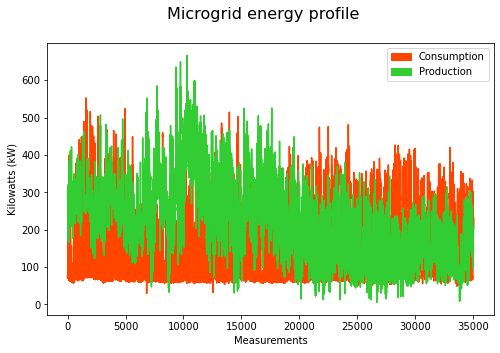

In [29]:
fig, ax2 = plt.subplots(1, 1)
black_patch = mpatches.Patch(color='orangered', label='Consumption')
red_patch = mpatches.Patch(color='limegreen', label='Production')


fig.set_size_inches(8, 5)

ax2.set_title("")


ax2.plot(df['consumption_usage'],color="orangered",alpha=1)
ax2.plot(df['production_usage'],color="limegreen",alpha=1)

ax2.set_xlabel("Measurements")
ax2.set_ylabel("Kilowatts (kW)")
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.legend(handles=[black_patch,red_patch])


fig.suptitle("Microgrid energy profile",fontsize=16)
plt.savefig('Microgrid_energy_profile.png')

In [76]:
def createTransformedDataSetHourlyFTE(columnName):
    df =  pd.read_csv("../data/data_processed_cleaned.csv")
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')

    df['fve'] = df['fve'] * 0.05
    df['mve'] = df['mve'] * 0.1
    df['wpg'] = df['wpg'] * 0.1

    df['production_usage'] = df['fve'] + df['mve'] + df['wpg']
    df = df.drop(df.index[0])
    columnString = []
    columnString.append("Date")
    for x in df['date'][:4*24]:
        #columnString.append(str(str(x.hour)+":"+str(x.minute)+":"+str(x.second)))
        columnString.append(str(str(x.hour)+":"+str(x.minute)+":"+str(x.second)))
    df2 = pd.DataFrame(columns=columnString)
    i = 0
    lastDay = ""
    dateT = "2020-01-01"
    for index, row in df.iterrows():
        if lastDay != dateT:
            lastDay = dateT
            i += 1
            df2.loc[i] = np.NaN
            df2.at[i, "date"] = dateT
        kW = row[columnName]

        time = str(str(row['date'].hour)+":"+str(row['date'].minute)+":"+str(row['date'].second))
        dateT = str(str(row['date'].year)+"-"+str(row['date'].month)+"-"+str(row['date'].day))
        df2.at[i, time] = kW
    df2 = df2.fillna(df[columnName].mean())
    df2 = df2.drop(df.index[0])
    df2 = df2.rename(columns={"date": "Date"})
    df2 = df2.drop(columns="Date")
    
    return df2

In [90]:
dfp = createTransformedDataSetHourlyFTE("production_usage")
dfc = createTransformedDataSetHourlyFTE("consumption_usage")


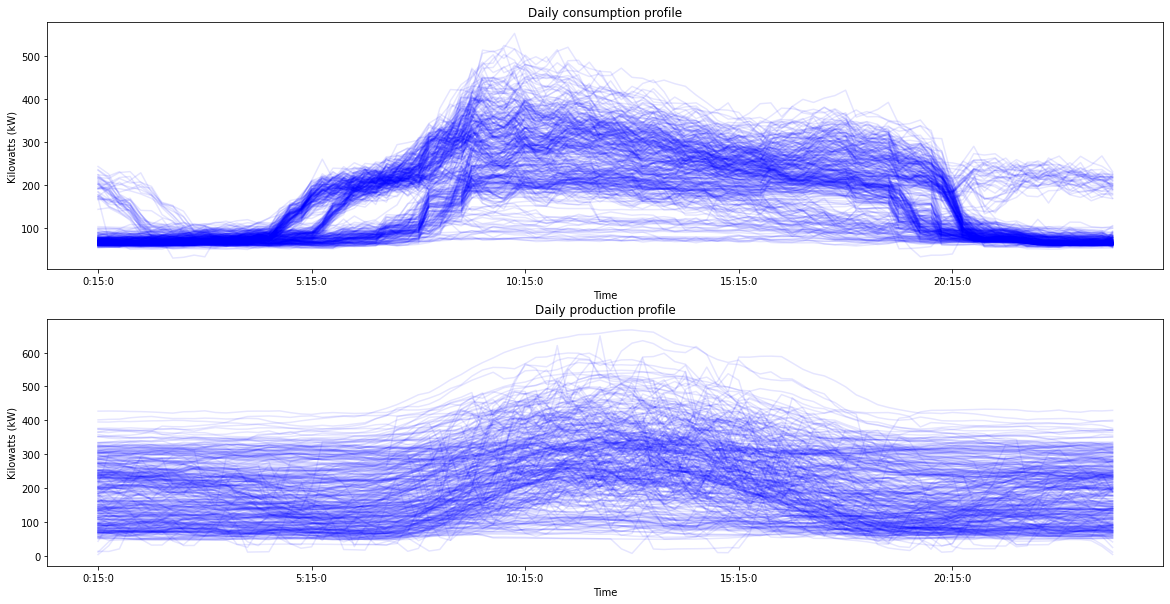

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

ax2.set_title("")
dfp.T.plot(legend=False, color="blue", alpha=0.1,ax=ax2) 
ax2.set_xlabel("Time")
ax2.set_ylabel("Kilowatts (kW)")
ax2.set_title("Daily production profile")


dfc.T.plot(legend=False, color="blue", alpha=0.1,ax=ax1) 
ax1.set_xlabel("Time")
ax1.set_ylabel("Kilowatts (kW)")
ax1.set_title("Daily consumption profile")

plt.savefig('daily_profiles.png')